In [1]:
import pandas as pd
import numpy as np
import os
import bs4
import json
import time

In [2]:
fp = os.path.join('statsbomb-lineups', '15946.json')
fp

'statsbomb-lineups/15946.json'

In [3]:
type(fp)

str

In [7]:
fp

'statsbomb-lineups/15946.json'

In [15]:
with open(fp, 'r') as f:
    test = json.load(f)
    
print(test)

[{'team_id': 217, 'team_name': 'Barcelona', 'lineup': [{'player_id': 3109, 'player_name': 'Malcom Filipe Silva de Oliveira', 'player_nickname': 'Malcom', 'jersey_number': 14, 'country': {'id': 31, 'name': 'Brazil'}, 'cards': [], 'positions': []}, {'player_id': 3501, 'player_name': 'Philippe Coutinho Correia', 'player_nickname': 'Philippe Coutinho', 'jersey_number': 7, 'country': {'id': 31, 'name': 'Brazil'}, 'cards': [], 'positions': [{'position_id': 2, 'position': 'Right Back', 'from': '45:00', 'to': '45:00', 'from_period': 2, 'to_period': 2, 'start_reason': 'Substitution - On (Tactical)', 'end_reason': 'Tactical Shift'}, {'position_id': 15, 'position': 'Left Center Midfield', 'from': '45:00', 'to': '76:18', 'from_period': 2, 'to_period': 2, 'start_reason': 'Tactical Shift', 'end_reason': 'Tactical Shift'}, {'position_id': 21, 'position': 'Left Wing', 'from': '76:18', 'to': None, 'from_period': 2, 'to_period': None, 'start_reason': 'Tactical Shift', 'end_reason': 'Final Whistle'}]}, {

In [19]:
test

[{'team_id': 217,
  'team_name': 'Barcelona',
  'lineup': [{'player_id': 3109,
    'player_name': 'Malcom Filipe Silva de Oliveira',
    'player_nickname': 'Malcom',
    'jersey_number': 14,
    'country': {'id': 31, 'name': 'Brazil'},
    'cards': [],
    'positions': []},
   {'player_id': 3501,
    'player_name': 'Philippe Coutinho Correia',
    'player_nickname': 'Philippe Coutinho',
    'jersey_number': 7,
    'country': {'id': 31, 'name': 'Brazil'},
    'cards': [],
    'positions': [{'position_id': 2,
      'position': 'Right Back',
      'from': '45:00',
      'to': '45:00',
      'from_period': 2,
      'to_period': 2,
      'start_reason': 'Substitution - On (Tactical)',
      'end_reason': 'Tactical Shift'},
     {'position_id': 15,
      'position': 'Left Center Midfield',
      'from': '45:00',
      'to': '76:18',
      'from_period': 2,
      'to_period': 2,
      'start_reason': 'Tactical Shift',
      'end_reason': 'Tactical Shift'},
     {'position_id': 21,
      'posi

In [2]:
df = pd.DataFrame(test)[['team_id', 'team_name']]
df.head()

NameError: name 'test' is not defined

In [21]:
test[0].get('lineup')

[{'player_id': 3109,
  'player_name': 'Malcom Filipe Silva de Oliveira',
  'player_nickname': 'Malcom',
  'jersey_number': 14,
  'country': {'id': 31, 'name': 'Brazil'},
  'cards': [],
  'positions': []},
 {'player_id': 3501,
  'player_name': 'Philippe Coutinho Correia',
  'player_nickname': 'Philippe Coutinho',
  'jersey_number': 7,
  'country': {'id': 31, 'name': 'Brazil'},
  'cards': [],
  'positions': [{'position_id': 2,
    'position': 'Right Back',
    'from': '45:00',
    'to': '45:00',
    'from_period': 2,
    'to_period': 2,
    'start_reason': 'Substitution - On (Tactical)',
    'end_reason': 'Tactical Shift'},
   {'position_id': 15,
    'position': 'Left Center Midfield',
    'from': '45:00',
    'to': '76:18',
    'from_period': 2,
    'to_period': 2,
    'start_reason': 'Tactical Shift',
    'end_reason': 'Tactical Shift'},
   {'position_id': 21,
    'position': 'Left Wing',
    'from': '76:18',
    'to': None,
    'from_period': 2,
    'to_period': None,
    'start_reaso

In [23]:
lineup_df = pd.DataFrame(test[0].get('lineup'))
lineup_df

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,"{'id': 31, 'name': 'Brazil'}",[],[]
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,"{'id': 31, 'name': 'Brazil'}",[],"[{'position_id': 2, 'position': 'Right Back', ..."
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 13, 'position': 'Right Center..."
3,5211,Jordi Alba Ramos,Jordi Alba,18,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 6, 'position': 'Left Back', '..."
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 3, 'position': 'Right Center ..."
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,"{'id': 242, 'name': 'Uruguay'}",[],"[{'position_id': 22, 'position': 'Right Center..."
6,5470,Ivan Rakitić,None,4,"{'id': 56, 'name': 'Croatia'}",[],"[{'position_id': 15, 'position': 'Left Center ..."
7,5477,Ousmane Dembélé,None,11,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 16, 'position': 'Left Midfiel..."
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 5, 'position': 'Left Center B..."
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,"{'id': 11, 'name': 'Argentina'}",[],"[{'position_id': 24, 'position': 'Left Center ..."


In [32]:
lineup_df["country_id"] = lineup_df.get("country").transform(lambda y: y['id'])
lineup_df["country_name"] = lineup_df.get("country").transform(lambda y: y['name'])
lineup_df

,player_id,player_name,player_nickname,jersey_number,country,cards,positions,country_id,country_name
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,"{'id': 31, 'name': 'Brazil'}",[],[],31,Brazil
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,"{'id': 31, 'name': 'Brazil'}",[],"[{'position_id': 2, 'position': 'Right Back', ...",31,Brazil
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 13, 'position': 'Right Center...",214,Spain
3,5211,Jordi Alba Ramos,Jordi Alba,18,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 6, 'position': 'Left Back', '...",214,Spain
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 3, 'position': 'Right Center ...",214,Spain
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,"{'id': 242, 'name': 'Uruguay'}",[],"[{'position_id': 22, 'position': 'Right Center...",242,Uruguay
6,5470,Ivan Rakitić,None,4,"{'id': 56, 'name': 'Croatia'}",[],"[{'position_id': 15, 'position': 'Left Center ...",56,Croatia
7,5477,Ousmane Dembélé,None,11,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 16, 'position': 'Left Midfiel...",78,France
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 5, 'position': 'Left Center B...",78,France
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,"{'id': 11, 'name': 'Argentina'}",[],"[{'position_id': 24, 'position': 'Left Center ...",11,Argentina


In [33]:
lineup_df = lineup_df.drop('country', axis = 1)

In [34]:
lineup_df

,player_id,player_name,player_nickname,jersey_number,cards,positions,country_id,country_name
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],[],31,Brazil
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],"[{'position_id': 2, 'position': 'Right Back', ...",31,Brazil
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],"[{'position_id': 13, 'position': 'Right Center...",214,Spain
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],"[{'position_id': 6, 'position': 'Left Back', '...",214,Spain
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],"[{'position_id': 3, 'position': 'Right Center ...",214,Spain
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],"[{'position_id': 22, 'position': 'Right Center...",242,Uruguay
6,5470,Ivan Rakitić,None,4,[],"[{'position_id': 15, 'position': 'Left Center ...",56,Croatia
7,5477,Ousmane Dembélé,None,11,[],"[{'position_id': 16, 'position': 'Left Midfiel...",78,France
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],"[{'position_id': 5, 'position': 'Left Center B...",78,France
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],"[{'position_id': 24, 'position': 'Left Center ...",11,Argentina


In [25]:
lineup_df.iloc[1].get('positions')

[{'position_id': 2,
  'position': 'Right Back',
  'from': '45:00',
  'to': '45:00',
  'from_period': 2,
  'to_period': 2,
  'start_reason': 'Substitution - On (Tactical)',
  'end_reason': 'Tactical Shift'},
 {'position_id': 15,
  'position': 'Left Center Midfield',
  'from': '45:00',
  'to': '76:18',
  'from_period': 2,
  'to_period': 2,
  'start_reason': 'Tactical Shift',
  'end_reason': 'Tactical Shift'},
 {'position_id': 21,
  'position': 'Left Wing',
  'from': '76:18',
  'to': None,
  'from_period': 2,
  'to_period': None,
  'start_reason': 'Tactical Shift',
  'end_reason': 'Final Whistle'}]

In [35]:
positions = lineup_df.get("positions")
positions

0                                                    []
1     [{'position_id': 2, 'position': 'Right Back', ...
2     [{'position_id': 13, 'position': 'Right Center...
3     [{'position_id': 6, 'position': 'Left Back', '...
4     [{'position_id': 3, 'position': 'Right Center ...
5     [{'position_id': 22, 'position': 'Right Center...
6     [{'position_id': 15, 'position': 'Left Center ...
7     [{'position_id': 16, 'position': 'Left Midfiel...
8     [{'position_id': 5, 'position': 'Left Center B...
9     [{'position_id': 24, 'position': 'Left Center ...
10    [{'position_id': 2, 'position': 'Right Back', ...
11    [{'position_id': 12, 'position': 'Right Midfie...
12                                                   []
13                                                   []
14    [{'position_id': 10, 'position': 'Center Defen...
15                                                   []
16    [{'position_id': 21, 'position': 'Left Wing', ...
17    [{'position_id': 1, 'position': 'Goalkeepe

In [47]:
transformed_positions = positions.apply(transform_positions)

In [48]:
transformed_positions

0                                                    {}
1     {'position_id': [2, 15, 21], 'position': ['Rig...
2     {'position_id': [13, 10], 'position': ['Right ...
3     {'position_id': [6], 'position': ['Left Back']...
4     {'position_id': [3], 'position': ['Right Cente...
5     {'position_id': [22, 23], 'position': ['Right ...
6     {'position_id': [15, 13, 10], 'position': ['Le...
7     {'position_id': [16, 21], 'position': ['Left M...
8     {'position_id': [5], 'position': ['Left Center...
9     {'position_id': [24, 17], 'position': ['Left C...
10    {'position_id': [2], 'position': ['Right Back'...
11    {'position_id': [12, 2], 'position': ['Right M...
12                                                   {}
13                                                   {}
14    {'position_id': [10, 13], 'position': ['Center...
15                                                   {}
16    {'position_id': [21, 15], 'position': ['Left W...
17    {'position_id': [1], 'position': ['Goalkee

In [50]:
lineup_df["position_id"] = transformed_positions.transform(lambda y: y['position_id'] if 'position_id' in y.keys() else None)
lineup_df["position"] = transformed_positions.transform(lambda y: y['position'] if 'position' in y.keys() else None)
lineup_df["from"] = transformed_positions.transform(lambda y: y['from'] if 'from' in y.keys() else None)
lineup_df["to"] = transformed_positions.transform(lambda y: y['to'] if 'to' in y.keys() else None)
lineup_df["from_period"] = transformed_positions.transform(lambda y: y['from_period'] if 'from_period' in y.keys() else None)
lineup_df["to_period"] = transformed_positions.transform(lambda y: y['to_period'] if 'to_period' in y.keys() else None)
lineup_df["start_reason"] = transformed_positions.transform(lambda y: y['start_reason'] if 'start_reason' in y.keys() else None)
lineup_df["end_reason"] = transformed_positions.transform(lambda y: y['end_reason'] if 'end_reason' in y.keys() else None)

lineup_df

,player_id,player_name,player_nickname,jersey_number,cards,positions,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],[],31,Brazil,None,None,None,None,None,None,None,None
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],"[{'position_id': 2, 'position': 'Right Back', ...",31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]"
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],"[{'position_id': 13, 'position': 'Right Center...",214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],"[{'position_id': 6, 'position': 'Left Back', '...",214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],"[{'position_id': 3, 'position': 'Right Center ...",214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],"[{'position_id': 22, 'position': 'Right Center...",242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"
6,5470,Ivan Rakitić,None,4,[],"[{'position_id': 15, 'position': 'Left Center ...",56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]"
7,5477,Ousmane Dembélé,None,11,[],"[{'position_id': 16, 'position': 'Left Midfiel...",78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],"[{'position_id': 5, 'position': 'Left Center B...",78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],"[{'position_id': 24, 'position': 'Left Center ...",11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"


In [51]:
lineup_df = lineup_df.drop('positions', axis = 1)
lineup_df

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],31,Brazil,None,None,None,None,None,None,None,None
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]"
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"
6,5470,Ivan Rakitić,None,4,[],56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]"
7,5477,Ousmane Dembélé,None,11,[],78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"


In [45]:
transformed_positions[1]

{'position_id': [2, 15, 21],
 'position': ['Right Back', 'Left Center Midfield', 'Left Wing'],
 'from': ['45:00', '45:00', '76:18'],
 'to': ['45:00', '76:18', None],
 'from_period': [2, 2, 2],
 'to_period': [2, 2, None],
 'start_reason': ['Substitution - On (Tactical)',
  'Tactical Shift',
  'Tactical Shift'],
 'end_reason': ['Tactical Shift', 'Tactical Shift', 'Final Whistle']}

In [28]:
position_dict = {}
for key, value in lineup_df.iloc[1].get('positions')[0].items():
    position_dict[key] = [value]
    
for key, value in lineup_df.iloc[1].get('positions')[1].items():
    position_dict[key].append(value)
    
for key, value in lineup_df.iloc[1].get('positions')[2].items():
    position_dict[key].append(value)
    
position_dict

{'position_id': [2, 15, 21],
 'position': ['Right Back', 'Left Center Midfield', 'Left Wing'],
 'from': ['45:00', '45:00', '76:18'],
 'to': ['45:00', '76:18', None],
 'from_period': [2, 2, 2],
 'to_period': [2, 2, None],
 'start_reason': ['Substitution - On (Tactical)',
  'Tactical Shift',
  'Tactical Shift'],
 'end_reason': ['Tactical Shift', 'Tactical Shift', 'Final Whistle']}

In [52]:
lineup_df['team_id'] = df.iloc[0].get('team_id')

In [54]:
lineup_df['team_name'] = df.iloc[0].get('team_name')

In [55]:
lineup_df

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],31,Brazil,None,None,None,None,None,None,None,None,217,Barcelona
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",217,Barcelona
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",217,Barcelona
6,5470,Ivan Rakitić,None,4,[],56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona
7,5477,Ousmane Dembélé,None,11,[],78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",217,Barcelona
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",217,Barcelona


In [56]:
lineup_1_df = pd.DataFrame(test[0].get('lineup'))
lineup_1_df

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,"{'id': 31, 'name': 'Brazil'}",[],[]
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,"{'id': 31, 'name': 'Brazil'}",[],"[{'position_id': 2, 'position': 'Right Back', ..."
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 13, 'position': 'Right Center..."
3,5211,Jordi Alba Ramos,Jordi Alba,18,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 6, 'position': 'Left Back', '..."
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 3, 'position': 'Right Center ..."
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,"{'id': 242, 'name': 'Uruguay'}",[],"[{'position_id': 22, 'position': 'Right Center..."
6,5470,Ivan Rakitić,None,4,"{'id': 56, 'name': 'Croatia'}",[],"[{'position_id': 15, 'position': 'Left Center ..."
7,5477,Ousmane Dembélé,None,11,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 16, 'position': 'Left Midfiel..."
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,"{'id': 78, 'name': 'France'}",[],"[{'position_id': 5, 'position': 'Left Center B..."
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,"{'id': 11, 'name': 'Argentina'}",[],"[{'position_id': 24, 'position': 'Left Center ..."


In [57]:
lineup_1_df["country_id"] = lineup_1_df.get("country").transform(lambda y: y['id'])
lineup_1_df["country_name"] = lineup_1_df.get("country").transform(lambda y: y['name'])
lineup_1_df = lineup_1_df.drop('country', axis = 1)
transformed_positions_1 = lineup_1_df.get("positions").apply(transform_positions)
lineup_1_df["position_id"] = transformed_positions_1.transform(lambda y: y['position_id'] if 'position_id' in y.keys() else None)
lineup_1_df["position"] = transformed_positions_1.transform(lambda y: y['position'] if 'position' in y.keys() else None)
lineup_1_df["from"] = transformed_positions_1.transform(lambda y: y['from'] if 'from' in y.keys() else None)
lineup_1_df["to"] = transformed_positions_1.transform(lambda y: y['to'] if 'to' in y.keys() else None)
lineup_1_df["from_period"] = transformed_positions_1.transform(lambda y: y['from_period'] if 'from_period' in y.keys() else None)
lineup_1_df["to_period"] = transformed_positions_1.transform(lambda y: y['to_period'] if 'to_period' in y.keys() else None)
lineup_1_df["start_reason"] = transformed_positions_1.transform(lambda y: y['start_reason'] if 'start_reason' in y.keys() else None)
lineup_1_df["end_reason"] = transformed_positions_1.transform(lambda y: y['end_reason'] if 'end_reason' in y.keys() else None)
lineup_1_df = lineup_1_df.drop('positions', axis = 1)
lineup_1_df

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],31,Brazil,None,None,None,None,None,None,None,None
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]"
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"
6,5470,Ivan Rakitić,None,4,[],56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]"
7,5477,Ousmane Dembélé,None,11,[],78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]"
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle]
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]"


In [58]:
lineup_1_df['team_id'] = df.iloc[1].get('team_id')
lineup_1_df['team_name'] = df.iloc[1].get('team_name')
lineup_1_df

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],31,Brazil,None,None,None,None,None,None,None,None,206,Deportivo Alavés
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",206,Deportivo Alavés
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",206,Deportivo Alavés
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],206,Deportivo Alavés
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],206,Deportivo Alavés
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",206,Deportivo Alavés
6,5470,Ivan Rakitić,None,4,[],56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",206,Deportivo Alavés
7,5477,Ousmane Dembélé,None,11,[],78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",206,Deportivo Alavés
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],206,Deportivo Alavés
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",206,Deportivo Alavés


In [65]:
merged = pd.concat([lineup_df, lineup_1_df]).reset_index(drop = True)

In [67]:
merged["game_id"] = 15946

In [68]:
merged

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,game_id
0,3109,Malcom Filipe Silva de Oliveira,Malcom,14,[],31,Brazil,None,None,None,None,None,None,None,None,217,Barcelona,15946
1,3501,Philippe Coutinho Correia,Philippe Coutinho,7,[],31,Brazil,"[2, 15, 21]","[Right Back, Left Center Midfield, Left Wing]","[45:00, 45:00, 76:18]","[45:00, 76:18, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,15946
2,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[13, 10]","[Right Center Midfield, Center Defensive Midfi...","[00:00, 45:00]","[45:00, 84:07]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",217,Barcelona,15946
3,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,[6],[Left Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona,15946
4,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,[3],[Right Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona,15946
5,5246,Luis Alberto Suárez Díaz,Luis Suárez,9,[],242,Uruguay,"[22, 23]","[Right Center Forward, Center Forward]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",217,Barcelona,15946
6,5470,Ivan Rakitić,None,4,[],56,Croatia,"[15, 13, 10]","[Left Center Midfield, Right Center Midfield, ...","[00:00, 45:00, 84:22]","[45:00, 84:22, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,15946
7,5477,Ousmane Dembélé,None,11,[],78,France,"[16, 21]","[Left Midfield, Left Wing]","[00:00, 45:00]","[45:00, 76:14]","[1, 2]","[2, 2]","[Starting XI, Tactical Shift]","[Tactical Shift, Substitution - Off (Tactical)]",217,Barcelona,15946
8,5492,Samuel Yves Umtiti,Samuel Umtiti,23,[],78,France,[5],[Left Center Back],[00:00],[None],[1],[None],[Starting XI],[Final Whistle],217,Barcelona,15946
9,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[24, 17]","[Left Center Forward, Right Wing]","[00:00, 45:00]","[45:00, None]","[1, 2]","[2, None]","[Starting XI, Tactical Shift]","[Tactical Shift, Final Whistle]",217,Barcelona,15946


In [6]:
directory = 'statsbomb-lineups'
json_files = os.listdir(directory)

In [7]:
json_files

['70284.json',
 '3775551.json',
 '2275044.json',
 '2275120.json',
 '69146.json',
 '267373.json',
 '68357.json',
 '69248.json',
 '7536.json',
 '3788771.json',
 '3775614.json',
 '19757.json',
 '70309.json',
 '3764238.json',
 '69232.json',
 '22936.json',
 '69279.json',
 '19766.json',
 '3775625.json',
 '3775589.json',
 '266838.json',
 '19814.json',
 '3749196.json',
 '303524.json',
 '3773593.json',
 '3775560.json',
 '18241.json',
 '68366.json',
 '2275075.json',
 '69177.json',
 '3749079.json',
 '3775647.json',
 '70275.json',
 '7565.json',
 '69334.json',
 '267101.json',
 '69250.json',
 '3788769.json',
 '266274.json',
 '266310.json',
 '16029.json',
 '2275138.json',
 '3775549.json',
 '69288.json',
 '2275026.json',
 '3795221.json',
 '2275142.json',
 '68335.json',
 '7492.json',
 '267192.json',
 '9948.json',
 '2275109.json',
 '3775578.json',
 '3749346.json',
 '19797.json',
 '3775591.json',
 '19735.json',
 '3788758.json',
 '2275084.json',
 '69186.json',
 '69305.json',
 '7554.json',
 '7430.json',
 '

In [6]:
int(json_files[0].strip('.json'))

70284

In [ ]:
# iterate through json files and do this process, creating a huge list of dfs to concatenate

In [8]:
game_lineups = []

In [ ]:
#def list_info(info_dict, keyword):
#    return lambda y:y[keyword] is in y.keys() else None

In [3]:
def transform_positions(position_list):
    position_dict = {}
    i = 0
    while i < len(position_list):
        early_dict = position_list[i]
        for key, value in early_dict.items():
            if i == 0:
                position_dict[key] = [value]
            else:
                position_dict[key].append(value)
        i = i + 1
    return position_dict

In [23]:
def clean_lineup(df):
    df["country"] = df["country"].transform(replace_dict)
    df["country_id"] = df.get("country").transform(lambda y: y['id'] if 'id' in y.keys() else None)
    df["country_name"] = df.get("country").transform(lambda y: y['name'] if 'name' in y.keys() else None)
    df = df.drop("country", axis = 1)
    
    if "positions" in df.columns:
        cleaned_pos = df.get("positions").apply(transform_positions)
        df["position_id"] = cleaned_pos.transform(lambda y: y['position_id'] if 'position_id' in y.keys() else None)
        df["position"] = cleaned_pos.transform(lambda y: y['position'] if 'position' in y.keys() else None)
        df["from"] = cleaned_pos.transform(lambda y: y['from'] if 'from' in y.keys() else None)
        df["to"] = cleaned_pos.transform(lambda y: y['to'] if 'to' in y.keys() else None)
        df["from_period"] = cleaned_pos.transform(lambda y: y['from_period'] if 'from_period' in y.keys() else None)
        df["to_period"] = cleaned_pos.transform(lambda y: y['to_period'] if 'to_period' in y.keys() else None)
        df["start_reason"] = cleaned_pos.transform(lambda y: y['start_reason'] if 'start_reason' in y.keys() else None)
        df["end_reason"] = cleaned_pos.transform(lambda y: y['end_reason'] if 'end_reason' in y.keys() else None)
        df = df.drop('positions', axis = 1)
    
    return df

In [24]:
for file in json_files:
    time.sleep(2)
    game_no = int(file.strip('.json'))
    fp = os.path.join(directory, file)
    
    with open(fp, 'r') as f:
        file_dict = json.load(f)
    
    print(game_no)
    team_df = pd.DataFrame(file_dict)[['team_id', 'team_name']]
    
    first_team = pd.DataFrame(file_dict[0].get('lineup'))
    second_team = pd.DataFrame(file_dict[1].get('lineup'))
    
    first_team = clean_lineup(first_team)
    second_team = clean_lineup(second_team)
    
    first_team['team_id'] = team_df.iloc[0].get('team_id')
    first_team['team_name'] = team_df.iloc[0].get('team_name')
    
    second_team['team_id'] = team_df.iloc[1].get('team_id')
    second_team['team_name'] = team_df.iloc[1].get('team_name')
    
    merged = pd.concat([first_team, second_team]).reset_index(drop = True)
    
    merged['match_id'] = game_no
    
    game_lineups.append(merged)

70284
3775551
2275044
2275120
69146
267373
68357
69248
7536
3788771
3775614
19757
70309
3764238
69232
22936
69279
19766
3775625
3775589
266838
19814
3749196
303524
3773593
3775560
18241
68366
2275075
69177
3749079
3775647
70275
7565
69334
267101
69250
3788769
266274
266310
16029
2275138
3775549
69288
2275026
3795221
2275142
68335
7492
267192
9948
2275109
3775578
3749346
19797
3775591
19735
3788758
2275084
69186
69305
7554
7430
9742
7548
69319
2275098
3788744
69236
19729
19762
3775621
3749192
3773597
3775564
267499
19810
266440
69173
68329
68362
69138
266033
18245
19821
3775555
267660
266846
70280
68353
266166
68318
69142
2275040
3788775
7532
7456
69207
22948
69328
7579
3775610
19753
266498
19718
7496
68331
2275146
19793
19808
19731
3775595
3775639
69265
69301
7550
9592
22961
69182
2275080
3775608
266603
70271
3775643
267576
7561
69330
69254
266299
16149
266815
70298
3788761
69213
69258
19747
3775604
3773474
3775541
70294
68347
7584
69156
2275054
2275130
3775570
19804
16010
2275065
6928

In [29]:
concatenated = pd.concat(game_lineups)

In [30]:
concatenated

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","[Right Wing, Right Center Forward, Right Midfi...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","[Right Center Midfield, Right Wing Back, Right...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],[Right Back],[00:00],[41:48],[1],[1],[Starting XI],[Substitution - Off (Injury)],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","[Center Defensive Midfield, Right Defensive Mi...","[59:28, 63:34, 78:25]","[63:34, 78:25, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","[Left Back, Left Center Back, Left Back]","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,6697,Daniel Ceballos Fernández,Dani Ceballos,24,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
32,6704,Theo Bernard François Hernández,Theo Hernández,15,[],78.0,France,None,None,None,None,None,None,None,None,220,Real Madrid,9924
33,6706,Francisco Casilla Cortés,Kiko Casilla,13,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
34,6893,Jesús Vallejo Lázaro,None,3,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924


In [34]:
games_1106 = game_lineups[332:]
len(games_1106)

1106

In [35]:
games_1106[0]

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45,Chile,"[17, 22, 12]","[Right Wing, Right Center Forward, Right Midfi...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214,Spain,"[13, 7, 13]","[Right Center Midfield, Right Wing Back, Right...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31,Brazil,[2],[Right Back],[00:00],[41:48],[1],[1],[Starting XI],[Substitution - Off (Injury)],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214,Spain,"[10, 9, 3]","[Center Defensive Midfield, Right Defensive Mi...","[59:28, 63:34, 78:25]","[63:34, 78:25, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214,Spain,"[6, 5, 6]","[Left Back, Left Center Back, Left Back]","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
5,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,[],214,Spain,"[3, 5, 4, 5]","[Right Center Back, Left Center Back, Center B...","[00:00, 48:37, 63:34, 78:25]","[48:37, 63:34, 78:25, None]","[1, 2, 2, 2]","[2, 2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift, ...","[Tactical Shift, Tactical Shift, Tactical Shif...",217,Barcelona,70284
6,5216,Andrés Iniesta Luján,Andrés Iniesta,8,[],214,Spain,"[15, 11, 15]","[Left Center Midfield, Left Defensive Midfield...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
7,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,[],11,Argentina,"[23, 19, 19]","[Center Forward, Center Attacking Midfield, Ce...","[00:00, 63:34, 78:25]","[63:34, 67:01, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Player Off (Permanent), Final...",217,Barcelona,70284
8,6658,Cristian Tello Herrera,Cristian Tello,37,[],214,Spain,"[21, 8, 16]","[Left Wing, Left Wing Back, Left Midfield]","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
9,7068,Marc Bartra Aregall,Marc Bartra,15,[],214,Spain,"[2, 3, 2]","[Right Back, Right Center Back, Right Back]","[41:48, 48:37, 78:25]","[48:37, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Substitution - On (Injury), Tactical Shift, T...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284


In [37]:
final_games = pd.concat(games_1106)

In [38]:
final_games

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","[Right Wing, Right Center Forward, Right Midfi...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","[Right Center Midfield, Right Wing Back, Right...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],[Right Back],[00:00],[41:48],[1],[1],[Starting XI],[Substitution - Off (Injury)],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","[Center Defensive Midfield, Right Defensive Mi...","[59:28, 63:34, 78:25]","[63:34, 78:25, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","[Left Back, Left Center Back, Left Back]","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,6697,Daniel Ceballos Fernández,Dani Ceballos,24,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
32,6704,Theo Bernard François Hernández,Theo Hernández,15,[],78.0,France,None,None,None,None,None,None,None,None,220,Real Madrid,9924
33,6706,Francisco Casilla Cortés,Kiko Casilla,13,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
34,6893,Jesús Vallejo Lázaro,None,3,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924


In [39]:
final_games.get("match_id").unique()

array([  70284, 3775551, 2275044, ...,   18235,   68359,    9924])

In [41]:
final_games = final_games.reset_index(drop = True)
final_games

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","[Right Wing, Right Center Forward, Right Midfi...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","[Right Center Midfield, Right Wing Back, Right...","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],[Right Back],[00:00],[41:48],[1],[1],[Starting XI],[Substitution - Off (Injury)],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","[Center Defensive Midfield, Right Defensive Mi...","[59:28, 63:34, 78:25]","[63:34, 78:25, None]","[2, 2, 2]","[2, 2, None]","[Substitution - On (Tactical), Tactical Shift,...","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","[Left Back, Left Center Back, Left Back]","[00:00, 63:34, 78:25]","[63:34, 78:25, None]","[1, 2, 2]","[2, 2, None]","[Starting XI, Tactical Shift, Tactical Shift]","[Tactical Shift, Tactical Shift, Final Whistle]",217,Barcelona,70284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35782,6697,Daniel Ceballos Fernández,Dani Ceballos,24,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
35783,6704,Theo Bernard François Hernández,Theo Hernández,15,[],78.0,France,None,None,None,None,None,None,None,None,220,Real Madrid,9924
35784,6706,Francisco Casilla Cortés,Kiko Casilla,13,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924
35785,6893,Jesús Vallejo Lázaro,None,3,[],214.0,Spain,None,None,None,None,None,None,None,None,220,Real Madrid,9924


In [125]:
(final_games_read.get('team_name') == "Portland Thorns").sum()

129

In [126]:
final_games_read.to_csv('final_games.csv', index = False)

In [22]:
with open(directory + '/265905.json', 'r') as f:
    file_dict = json.load(f)

file_dict

[{'team_id': 761,
  'team_name': 'Chicago Red Stars',
  'lineup': [{'player_id': 4942,
    'player_name': 'Arin Gilliland',
    'player_nickname': None,
    'jersey_number': 3,
    'country': {'id': 241, 'name': 'United States of America'}},
   {'player_id': 4947,
    'player_name': 'Danielle Colaprico',
    'player_nickname': None,
    'jersey_number': 24,
    'country': {'id': 241, 'name': 'United States of America'}},
   {'player_id': 4952,
    'player_name': 'Emily Boyd',
    'player_nickname': None,
    'jersey_number': 21,
    'country': {'id': 241, 'name': 'United States of America'}},
   {'player_id': 4955,
    'player_name': 'Sarah Gorden',
    'player_nickname': None,
    'jersey_number': 14,
    'country': {'id': 241, 'name': 'United States of America'}},
   {'player_id': 4958,
    'player_name': 'Kathleen Naughton',
    'player_nickname': None,
    'jersey_number': 5,
    'country': {'id': 241, 'name': 'United States of America'}},
   {'player_id': 4961,
    'player_name': 

In [11]:
second_team = pd.DataFrame(file_dict[1].get('lineup'))

In [12]:
second_team

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,6755,Sergio Asenjo Andrés,Sergio Asenjo,1,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
1,6787,Pedro López Muñoz,Pedro López,16,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 2, 'position': 'Right Back', ..."
2,6907,Pedro León Sánchez Gil,Pedro León,12,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 17, 'position': 'Right Wing',..."
3,12358,Haris Medunjanin,None,23,"{'id': 28, 'name': 'Bosnia and Herzegovina'}",[],"[{'position_id': 10, 'position': 'Center Defen..."
4,25955,Jonathan Sesma González,Jonathan Sesma,19,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 21, 'position': 'Left Wing', ..."
5,25980,Néstor Fabián Canobbio Bentaberry,Fabián Canobbio,20,"{'id': 242, 'name': 'Uruguay'}",[],"[{'position_id': 10, 'position': 'Center Defen..."
6,26053,Ángel Manuel Vivar Dorado,Ángel Vivar Dorado,14,"{'id': 214, 'name': 'Spain'}","[{'time': '74:01', 'card_type': 'Yellow Card',...","[{'position_id': 15, 'position': 'Left Center ..."
7,26116,José Antonio García Calvo,José García Calvo,5,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 3, 'position': 'Right Center ..."
8,26131,Victoriano Rivas Álvaro,Nano,11,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 5, 'position': 'Left Center B..."
9,26188,Alberto Marcos Rey,Alberto Marcos,3,"{'id': 214, 'name': 'Spain'}",[],"[{'position_id': 6, 'position': 'Left Back', '..."


In [18]:
def replace_dict(val):
    if pd.isna(val) or type(val) != dict:
        return {}
    return val

In [19]:
second_team.get("country").transform(replace_dict)

0                     {'id': 214, 'name': 'Spain'}
1                     {'id': 214, 'name': 'Spain'}
2                     {'id': 214, 'name': 'Spain'}
3     {'id': 28, 'name': 'Bosnia and Herzegovina'}
4                     {'id': 214, 'name': 'Spain'}
5                   {'id': 242, 'name': 'Uruguay'}
6                     {'id': 214, 'name': 'Spain'}
7                     {'id': 214, 'name': 'Spain'}
8                     {'id': 214, 'name': 'Spain'}
9                     {'id': 214, 'name': 'Spain'}
10                    {'id': 214, 'name': 'Spain'}
11                                              {}
12                 {'id': 11, 'name': 'Argentina'}
13                 {'id': 11, 'name': 'Argentina'}
Name: country, dtype: object

In [3]:
final_games_read = pd.read_csv('final_games')

In [48]:
final_games_read.dtypes

Unnamed: 0           int64
player_id            int64
player_name         object
player_nickname     object
jersey_number        int64
cards               object
country_id         float64
country_name        object
position_id         object
position            object
from                object
to                  object
from_period         object
to_period           object
start_reason        object
end_reason          object
team_id              int64
team_name           object
match_id             int64
dtype: object

In [5]:
final_games_read = final_games_read.drop('Unnamed: 0', axis = 1)
final_games_read.head(5)

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","['Right Wing', 'Right Center Forward', 'Right ...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","['Right Center Midfield', 'Right Wing Back', '...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],['Right Back'],['00:00'],['41:48'],[1],[1],['Starting XI'],['Substitution - Off (Injury)'],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","['Center Defensive Midfield', 'Right Defensive...","['59:28', '63:34', '78:25']","['63:34', '78:25', None]","[2, 2, 2]","[2, 2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","['Left Back', 'Left Center Back', 'Left Back']","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284


In [ ]:
te

In [105]:
locs = final_games_read.get("match_id") == 3749133
final_games_read.loc[locs, :] = final_games_read.loc[locs].replace({'Aston Villa': 'Aston Villa Men'})

locs = final_games_read.get("match_id") == 3749552
final_games_read.loc[locs, :] = final_games_read.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = final_games_read.get("match_id") == 3749246
final_games_read.loc[locs, :] = final_games_read.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = final_games_read.get("match_id") == 18236
final_games_read.loc[locs, :] = final_games_read.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = final_games_read.get("match_id") == 3750201
final_games_read.loc[locs, :] = final_games_read.loc[locs].replace({'Manchester United': 'Manchester United Men'})

final_games_read = final_games_read.replace({'Seattle Reign': 'OL Reign', 'Sky Blue FC': 'NJ/NY Gotham FC'})


In [107]:
final_games_read[final_games_read.get('team_name') == 'OL Reign']


,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
9075,4994,Nahomi Kawasumi,NaN,9,[],114.0,Japan,"[21, 17]","['Left Wing', 'Right Wing']","['00:00', '73:43']","['73:43', None]","[1, 2]","[2, None]","['Starting XI', 'Tactical Shift']","['Tactical Shift', 'Final Whistle']",760,OL Reign,7443
9076,4996,Morgan Andrews,NaN,12,[],241.0,United States of America,[21],['Left Wing'],['75:49'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],760,OL Reign,7443
9077,4997,Alyssa Kleiner,NaN,24,"[{'time': '86:53', 'card_type': 'Yellow Card',...",241.0,United States of America,"[17, 2]","['Right Wing', 'Right Back']","['70:02', '73:43']","['73:43', None]","[2, 2]","[2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Final Whistle']",760,OL Reign,7443
9078,4998,Rumi Utsugi,NaN,20,[],114.0,Japan,[15],['Left Center Midfield'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],760,OL Reign,7443
9079,5000,Stephanie-Elise Catley,NaN,7,[],14.0,Australia,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],760,OL Reign,7443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32978,5066,Lydia Grace Yilkari Williams,NaN,1,[],14.0,Australia,[1],['Goalkeeper'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],760,OL Reign,7480
32979,5069,Theresa Nielsen,NaN,8,[],61.0,Denmark,[2],['Right Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],760,OL Reign,7480
32980,5077,Jasmyne Spencer,NaN,22,[],241.0,United States of America,"[17, 21]","['Right Wing', 'Left Wing']","['61:43', '88:26']","['88:26', None]","[2, 2]","[2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Final Whistle']",760,OL Reign,7480
32981,8297,Adriana Kristina Leon,NaN,13,[],40.0,Canada,[17],['Right Wing'],['00:00'],['61:43'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],760,OL Reign,7480


In [95]:
final_games_read.get('position').apply(lambda x: replace_string_list(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [94]:
def replace_string_list(str_list):
    if pd.isna(str_list) == True: #or type(str_list) == list:
        return str_list
    return str_list.str.strip('[]').replace("'", "").str.split(', ')

In [48]:
#final_games_read['position'] = final_games_read['position'].transform(replace_string_list)
final_games_read['from'] = final_games_read['from'].transform(replace_string_list)
final_games_read['to'] = final_games_read['to'].transform(replace_string_list)
final_games_read['start_reason'] = final_games_read['start_reason'].transform(replace_string_list)
final_games_read['end_reason'] = final_games_read['end_reason'].transform(replace_string_list)


In [49]:
final_games_read

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","['Right Wing', 'Right Center Forward', 'Right ...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","['Right Center Midfield', 'Right Wing Back', '...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],['Right Back'],['00:00'],['41:48'],[1],[1],['Starting XI'],['Substitution - Off (Injury)'],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","['Center Defensive Midfield', 'Right Defensive...","['59:28', '63:34', '78:25']","['63:34', '78:25', None]","[2, 2, 2]","[2, 2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","['Left Back', 'Left Center Back', 'Left Back']","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35782,6697,Daniel Ceballos Fernández,Dani Ceballos,24,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35783,6704,Theo Bernard François Hernández,Theo Hernández,15,[],78.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35784,6706,Francisco Casilla Cortés,Kiko Casilla,13,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35785,6893,Jesús Vallejo Lázaro,NaN,3,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924


In [220]:
final_games_read[final_games_read.get('match_id') == 22973]

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
34913,4633,Magdalena Lilly Eriksson,NaN,6,[],220.0,Sweden,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],858,Sweden Women's,22973
34914,4640,Rut Hedvig Lindahl,Hedvig Lindahl,1,[],220.0,Sweden,[1],['Goalkeeper'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],858,Sweden Women's,22973
34915,10205,Olivia Alma Charlotta Schough,Olivia Schough,22,[],220.0,Sweden,"[15, 21]","['Left Center Midfield', 'Left Wing']","['68:49', '68:51']","['68:51', None]","[2, 2]","[2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Final Whistle']",858,Sweden Women's,22973
34916,10215,Fridolina Rolfö,NaN,18,[],220.0,Sweden,[17],['Right Wing'],['00:00'],['45:00'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],858,Sweden Women's,22973
34917,10220,Kosovare Asllani,NaN,9,[],220.0,Sweden,"[19, 13]","['Center Attacking Midfield', 'Right Center Mi...","['00:00', '68:51']","['68:51', None]","[1, 2]","[2, None]","['Starting XI', 'Tactical Shift']","['Tactical Shift', 'Final Whistle']",858,Sweden Women's,22973
34918,10221,Elin Ingrid Johanna Rubensson,Elin Rubensson,23,[],220.0,Sweden,"[13, 15]","['Right Center Midfield', 'Left Center Midfield']","['00:00', '68:51']","['68:51', None]","[1, 2]","[2, None]","['Starting XI', 'Tactical Shift']","['Tactical Shift', 'Final Whistle']",858,Sweden Women's,22973
34919,10224,Sara Caroline Seger,NaN,17,[],220.0,Sweden,[15],['Left Center Midfield'],['00:00'],['68:49'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],858,Sweden Women's,22973
34920,10230,Linda Brigitta Sembrant,Linda Sembrant,3,[],220.0,Sweden,[5],['Left Center Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],858,Sweden Women's,22973
34921,10375,Nilla Fischer,NaN,5,[],220.0,Sweden,[3],['Right Center Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],858,Sweden Women's,22973
34922,10665,Mimmi Larsson,NaN,20,[],220.0,Sweden,[23],['Center Forward'],['76:45'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],858,Sweden Women's,22973


In [246]:
player_matches_pos = final_games_read.get(['team_name', 'player_name', 'position', 'match_id']).explode(column = 'position').dropna().drop_duplicates()

In [247]:
#player_matches_pos['player_name'] = player_matches_pos['player_name'].replace(name_dict)
player_matches_pos

,team_name,player_name,position,match_id
0,Barcelona,Alexis Alejandro Sánchez Sánchez,'Right Wing',70284
0,Barcelona,Alexis Alejandro Sánchez Sánchez,'Right Center Forward',70284
0,Barcelona,Alexis Alejandro Sánchez Sánchez,'Right Midfield',70284
1,Barcelona,Francesc Fàbregas i Soler,'Right Center Midfield',70284
1,Barcelona,Francesc Fàbregas i Soler,'Right Wing Back',70284
...,...,...,...,...
35778,Real Madrid,Toni Kroos,'Left Center Midfield',9924
35779,Real Madrid,Keylor Navas Gamboa,'Goalkeeper',9924
35780,Real Madrid,Marco Asensio Willemsen,'Left Wing',9924
35781,Real Madrid,Gareth Frank Bale,'Right Wing',9924


In [248]:
player_matches_pos['position'] = player_matches_pos['position'].transform(lambda x: x.str.strip("'"))

In [249]:
player_matches_pos['position'] = player_matches_pos['position'].replace({'None': np.nan})

In [250]:
player_matches_pos = player_matches_pos.dropna()
player_matches_pos

,team_name,player_name,position,match_id
0,Barcelona,Alexis Alejandro Sánchez Sánchez,Right Wing,70284
0,Barcelona,Alexis Alejandro Sánchez Sánchez,Right Center Forward,70284
0,Barcelona,Alexis Alejandro Sánchez Sánchez,Right Midfield,70284
1,Barcelona,Francesc Fàbregas i Soler,Right Center Midfield,70284
1,Barcelona,Francesc Fàbregas i Soler,Right Wing Back,70284
...,...,...,...,...
35778,Real Madrid,Toni Kroos,Left Center Midfield,9924
35779,Real Madrid,Keylor Navas Gamboa,Goalkeeper,9924
35780,Real Madrid,Marco Asensio Willemsen,Left Wing,9924
35781,Real Madrid,Gareth Frank Bale,Right Wing,9924


In [251]:
counts = player_matches_pos.groupby(['team_name', 'position', 'player_name']).count().rename(columns = {'match_id': 'count'})


In [252]:
counts

count
team_name       position                  player_name                            
AC Milan        Center Attacking Midfield Ricardo Izecson dos Santos Leite      1
                Center Defensive Midfield Andrea Pirlo                          2
                Center Forward            Alberto Gilardino                     1
                                          Filippo Inzaghi                       1
                Goalkeeper                Nelson de Jesus da Silva              2
...                                                                           ...
Yeovil Town LFC Right Wing                Olivia Fergusson                      2
                                          Rachel Mclauchlan                     1
                                          Shannon Albuery                       1
                Right Wing Back           Amy Goddard                           1
                                          Charlotte Buxton                      1

[13951 rows x 1 columns]

In [255]:
counts.loc['Real Madrid', 'Center Forward']

,count
player_name,
Cristiano Ronaldo dos Santos Aveiro,6
Emmanuel Adebayor,1
Gareth Frank Bale,1
Gonzalo Gerardo Higuaín,3
James David Rodríguez Rubio,1
Jesé Rodríguez Ruiz,1
José Antonio Reyes Calderón,1
Karim Benzema,22
Lucas Vázquez Iglesias,1


In [144]:
locs = final_games_read['from'].isna() == False
only_played = final_games_read.loc[locs, :]

In [152]:
played_df = pd.DataFrame(only_played.groupby(['team_name', 'player_name']).count()['match_id'].rename('count'))
played_df

count
team_name       player_name             
AC Milan        Alberto Gilardino      1
                Alessandro Nesta       2
                Andrea Pirlo           2
                Andriy Shevchenko      1
                Clarence Seedorf       2
...                                  ...
Yeovil Town LFC Monique Fischer        4
                Nicola Cousins        17
                Olivia Fergusson      19
                Rachel Mclauchlan      6
                Shannon Albuery        7

[5616 rows x 1 columns]

In [160]:
read_played = pd.read_csv('players_no_games.csv')
read_played

,team_name,player_name,count
0,AC Milan,Alberto Gilardino,1
1,AC Milan,Alessandro Nesta,2
2,AC Milan,Andrea Pirlo,2
3,AC Milan,Andriy Shevchenko,1
4,AC Milan,Clarence Seedorf,2
...,...,...,...
5611,Yeovil Town LFC,Monique Fischer,4
5612,Yeovil Town LFC,Nicola Cousins,17
5613,Yeovil Town LFC,Olivia Fergusson,19
5614,Yeovil Town LFC,Rachel Mclauchlan,6


In [181]:
replaced = read_played.replace(name_dict)

In [171]:
played_ver = read_played.merge(names_nicknames).drop('player_name', axis = 1).rename(columns = {'player_nickname': 'name'})

In [172]:
played_ver

,team_name,count,name
0,AC Milan,1,Serginho
1,AC Milan,1,Serginho
2,AC Milan,1,Hernán Crespo
3,AC Milan,1,Hernán Crespo
4,Chelsea,1,Hernán Crespo
...,...,...,...
31679,Xerez,2,Leandro Gioda
31680,Xerez,2,Leandro Gioda
31681,Xerez,2,Sidi Keita
31682,Xerez,2,Sidi Keita


In [174]:
played_ver.set_index(['team_name', 'name'])

count
team_name name                 
AC Milan  Serginho            1
          Serginho            1
          Hernán Crespo       1
          Hernán Crespo       1
Chelsea   Hernán Crespo       1
...                         ...
Xerez     Leandro Gioda       2
          Leandro Gioda       2
          Sidi Keita          2
          Sidi Keita          2
          Vicente Moreno      1

[31684 rows x 1 columns]

In [182]:
replaced.to_csv('nicknames_no_games.csv', index = False)

In [159]:
played_df.to_csv('players_no_games.csv', index = True)

In [158]:
played_df.loc['NJ/NY Gotham FC']

,count
player_name,
Amanda Frisbie,6
Carli Anne Hollins,5
Caroline Casey,1
Christina Gibbons,2
Dominique Richardson,6
Erica Skroski,6
Imani Dorsey,5
Janine Elizabeth Beckie,6
Jennifer Hoy,1


In [61]:
names_nicknames = final_games_read.get(['player_name', 'player_nickname'])
names_nicknames

,player_name,player_nickname
0,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez
1,Francesc Fàbregas i Soler,Cesc Fàbregas
2,Daniel Alves da Silva,Dani Alves
3,Sergio Busquets i Burgos,Sergio Busquets
4,Jordi Alba Ramos,Jordi Alba
...,...,...
35782,Daniel Ceballos Fernández,Dani Ceballos
35783,Theo Bernard François Hernández,Theo Hernández
35784,Francisco Casilla Cortés,Kiko Casilla
35785,Jesús Vallejo Lázaro,NaN


In [69]:
names_nicknames = names_nicknames.dropna().reset_index(drop = True)
names_nicknames

,player_name,player_nickname
0,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez
1,Francesc Fàbregas i Soler,Cesc Fàbregas
2,Daniel Alves da Silva,Dani Alves
3,Sergio Busquets i Burgos,Sergio Busquets
4,Jordi Alba Ramos,Jordi Alba
...,...,...
16954,Keylor Navas Gamboa,Keylor Navas
16955,Gareth Frank Bale,Gareth Bale
16956,Daniel Ceballos Fernández,Dani Ceballos
16957,Theo Bernard François Hernández,Theo Hernández


In [70]:
names_nicknames.to_csv('names_nicknames.csv', index = False)

In [179]:
name_dict = names_nicknames.dropna().set_index('player_name').to_dict()['player_nickname']

In [54]:
rm = final_games_read[final_games_read.get('team_name') == 'Real Madrid']
rm

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
871,2995,Ángel Fabián Di María Hernández,Ángel Di María,22,[],11.0,Argentina,[15],['Left Center Midfield'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],220,Real Madrid,18241
872,3477,Álvaro Borja Morata Martín,Álvaro Morata,21,[],214.0,Spain,[23],['Center Forward'],['78:10'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],220,Real Madrid,18241
873,4926,Francisco Román Alarcón Suárez,Isco,23,[],214.0,Spain,[10],['Center Defensive Midfield'],['58:19'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],220,Real Madrid,18241
874,5201,Sergio Ramos García,Sergio Ramos,4,"[{'time': '26:55', 'card_type': 'Yellow Card',...",214.0,Spain,[5],['Left Center Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],220,Real Madrid,18241
875,5207,Cristiano Ronaldo dos Santos Aveiro,Cristiano Ronaldo,7,"[{'time': '12:18', 'card_type': 'Yellow Card',...",183.0,Portugal,[21],['Left Wing'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],220,Real Madrid,18241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35782,6697,Daniel Ceballos Fernández,Dani Ceballos,24,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35783,6704,Theo Bernard François Hernández,Theo Hernández,15,[],78.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35784,6706,Francisco Casilla Cortés,Kiko Casilla,13,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924
35785,6893,Jesús Vallejo Lázaro,NaN,3,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,Real Madrid,9924


In [81]:
final_games_read.get('position')[0]

["'Right Wing'", "'Right Center Forward'", "'Right Midfield'"]

In [73]:
isco = rm[rm.get('player_nickname') == 'Isco']
isco

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
873,4926,Francisco Román Alarcón Suárez,Isco,23,[],214.0,Spain,[10],['Center Defensive Midfield'],['58:19'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],220,Real Madrid,18241
2694,4926,Francisco Román Alarcón Suárez,Isco,22,[],214.0,Spain,[19],['Center Attacking Midfield'],['00:00'],['60:56'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,18245
5102,4926,Francisco Román Alarcón Suárez,Isco,22,"[{'time': '75:42', 'card_type': 'Yellow Card',...",214.0,Spain,[19],['Center Attacking Midfield'],['00:00'],['79:12'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,303596
9235,4926,Francisco Román Alarcón Suárez,Isco,23,[],214.0,Spain,[16],['Left Midfield'],['00:00'],['82:52'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,267085
10901,4926,Francisco Román Alarcón Suárez,Isco,23,"[{'time': '63:04', 'card_type': 'Yellow Card',...",214.0,Spain,[15],['Left Center Midfield'],['00:00'],['79:34'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,267183
13765,4926,Francisco Román Alarcón Suárez,Isco,22,[],214.0,Spain,[13],['Right Center Midfield'],['00:00'],['78:23'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,303470
16423,4926,Francisco Román Alarcón Suárez,Isco,22,[],214.0,Spain,[19],['Center Attacking Midfield'],['00:00'],['81:59'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,18244
19428,4926,Francisco Román Alarcón Suárez,Isco,22,"[{'time': '12:36', 'card_type': 'Yellow Card',...",214.0,Spain,[19],['Center Attacking Midfield'],['00:00'],['65:21'],[1],[2],['Starting XI'],['Substitution - Off (Tactical)'],220,Real Madrid,267076
24422,4926,Francisco Román Alarcón Suárez,Isco,22,[],214.0,Spain,"[10, 19]","['Center Defensive Midfield', 'Center Attackin...","['75:00', '75:07']","['75:07', None]","[2, 2]","[2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Final Whistle']",220,Real Madrid,16196
27583,4926,Francisco Román Alarcón Suárez,Isco,22,[],214.0,Spain,[15],['Left Center Midfield'],['71:44'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],220,Real Madrid,18243


In [131]:
isco.loc[28318].get('cards')

"[{'time': '83:48', 'card_type': 'Red Card', 'reason': 'Foul Committed', 'period': 2}]"

In [130]:
isco.get(['from', 'to']).explode(['from', 'to']).dropna(how = 'all')

,from,to
873,'58:19',None
2694,'00:00','60:56'
5102,'00:00','79:12'
9235,'00:00','82:52'
10901,'00:00','79:34'
13765,'00:00','78:23'
16423,'00:00','81:59'
19428,'00:00','65:21'
24422,'75:00','75:07'
24422,'75:07',None


In [57]:
rm.groupby('player_name')['match_id'].count()['Karim Benzema']

27

In [50]:
barca = final_games_read[final_games_read.get('team_name') == 'Barcelona']
barca

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
0,3385,Alexis Alejandro Sánchez Sánchez,Alexis Sánchez,9,"[{'time': '72:02', 'card_type': 'Yellow Card',...",45.0,Chile,"[17, 22, 12]","['Right Wing', 'Right Center Forward', 'Right ...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
1,3478,Francesc Fàbregas i Soler,Cesc Fàbregas,4,"[{'time': '72:59', 'card_type': 'Yellow Card',...",214.0,Spain,"[13, 7, 13]","['Right Center Midfield', 'Right Wing Back', '...","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
2,4324,Daniel Alves da Silva,Dani Alves,2,[],31.0,Brazil,[2],['Right Back'],['00:00'],['41:48'],[1],[1],['Starting XI'],['Substitution - Off (Injury)'],217,Barcelona,70284
3,5203,Sergio Busquets i Burgos,Sergio Busquets,5,[],214.0,Spain,"[10, 9, 3]","['Center Defensive Midfield', 'Right Defensive...","['59:28', '63:34', '78:25']","['63:34', '78:25', None]","[2, 2, 2]","[2, 2, None]","['Substitution - On (Tactical)', 'Tactical Shi...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","['Left Back', 'Left Center Back', 'Left Back']","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35764,6379,Sergi Roberto Carnicer,Sergi Roberto,20,"[{'time': '47:06', 'card_type': 'Red Card', 'r...",214.0,Spain,[2],['Right Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,9924
35765,6402,Francisco Alcácer García,Paco Alcácer,17,[],214.0,Spain,[23],['Center Forward'],['91:50'],[None],[2],[None],['Substitution - On (Tactical)'],['Final Whistle'],217,Barcelona,9924
35766,6609,Denis Suárez Fernández,Denis Suárez,6,[],214.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217,Barcelona,9924
35767,8652,Jasper Cillessen,NaN,13,[],160.0,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217,Barcelona,9924


In [53]:
barca.groupby('player_name')['match_id'].count()

player_name
Abel Ruiz Ortega                    2
Adriano Correia Claro             114
Albert Jorquera i Fortiá            6
Aleix Vidal Parreu                 39
Alexandre Dimitri Song-Billong     30
                                 ... 
Xavier Hernández Creus            265
Yerry Fernando Mina González        7
Zlatan Ibrahimović                 26
Álex Collado Gutiérrez             12
Óscar Mingueza García              29
Name: match_id, Length: 144, dtype: int64

In [26]:
jordi_alba = barca[barca.get('player_nickname') == 'Jordi Alba']

In [27]:
jordi_alba

,player_id,player_name,player_nickname,jersey_number,cards,country_id,country_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason,team_id,team_name,match_id
4,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,"[6, 5, 6]","['Left Back', 'Left Center Back', 'Left Back']","['00:00', '63:34', '78:25']","['63:34', '78:25', None]","[1, 2, 2]","[2, 2, None]","['Starting XI', 'Tactical Shift', 'Tactical Sh...","['Tactical Shift', 'Tactical Shift', 'Final Wh...",217,Barcelona,70284
178,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,267373
403,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,70309
686,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,266838
812,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,3773593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35424,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,303615
35484,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,70307
35511,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,70263
35554,5211,Jordi Alba Ramos,Jordi Alba,18,[],214.0,Spain,[6],['Left Back'],['00:00'],[None],[1],[None],['Starting XI'],['Final Whistle'],217,Barcelona,265866


In [28]:
jordi_alba.get("from")

4        ['00:00', '63:34', '78:25']
178                        ['00:00']
403                        ['00:00']
686                        ['00:00']
812                        ['00:00']
                    ...             
35424                      ['00:00']
35484                      ['00:00']
35511                      ['00:00']
35554                      ['00:00']
35753                      ['00:00']
Name: from, Length: 240, dtype: object

In [29]:
jordi_alba.get("to")

4        ['63:34', '78:25', None]
178                        [None]
403                        [None]
686                        [None]
812                        [None]
                   ...           
35424                      [None]
35484                      [None]
35511                      [None]
35554                      [None]
35753                      [None]
Name: to, Length: 240, dtype: object

In [17]:
test = barca.get('position')[4]
test

"['Left Back', 'Left Center Back', 'Left Back']"

In [32]:
type(test.strip('[]').replace("'", "").split(', '))

list

In [39]:
barca_positions = barca.get(['player_name', 'position']).set_index('player_name').transform(replace_string_list)

In [44]:
barca_positions.explode('position').loc['Jordi Alba Ramos']

,position
player_name,
Jordi Alba Ramos,'Left Back'
Jordi Alba Ramos,'Left Center Back'
Jordi Alba Ramos,'Left Back'
Jordi Alba Ramos,'Left Back'
Jordi Alba Ramos,'Left Back'
...,...
Jordi Alba Ramos,'Left Back'
Jordi Alba Ramos,'Left Back'
Jordi Alba Ramos,'Left Back'


In [2]:
type_ids = pd.read_csv('nonNull.csv')[['type_name', 'team_name']]
type_ids.head(5)

,type_name,team_name
0,Starting XI,Reading WFC
1,Starting XI,Birmingham City WFC
2,Half Start,Birmingham City WFC
3,Half Start,Reading WFC
4,Pass,Birmingham City WFC


In [3]:
type_ids = type_ids[type_ids.get('type_name') == 'Pass']
type_ids.head(5)

,type_name,team_name
4,Pass,Birmingham City WFC
8,Pass,Birmingham City WFC
12,Pass,Reading WFC
16,Pass,Reading WFC
23,Pass,Birmingham City WFC


In [ ]:
player_positions_some = pd.read_csv('someNull.csv')[['player_name', 'position_name']]
player_positions_some.head(5)

In [5]:
actual_passes.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession'],
      dtype='object')

In [2]:
passes_players = pd.read_csv('passes_players.csv')
passes_players.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,...,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,Success,player_name
0,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,...,65.0,Kick Off,40.0,Right Foot,53.9,39.6,61.0,40.1,True,Rachel Williams
1,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,...,NaN,NaN,40.0,Right Foot,118.4,72.9,52.8,42.7,True,Lucy Staniforth
2,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d,...,63.0,Goal Kick,38.0,Left Foot,13.4,54.2,6.0,44.0,True,Rachael Laws
3,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,575a6ca7-9736-4487-bd1f-12ee10011319,...,NaN,NaN,40.0,Right Foot,62.0,60.2,39.6,58.2,True,Sophie Howard
4,30,Pass,974,Reading WFC,7,From Goal Kick,969,Birmingham City WFC,2275050,719c6c68-fa1e-4aab-ab70-601450bc44d6,...,NaN,NaN,38.0,Left Foot,69.9,13.3,35.8,9.9,True,Rebecca Holloway


In [ ]:
re_indexed = passes_players.set_index([''])

In [6]:
passes_players.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'Success', 'player_name'],
      dtype='object')

In [9]:
passes_players.get('pass_recipient_name')

0                         Lucy Staniforth
1                          Claudia Walker
2                           Sophie Howard
3                   Amalie Vevle Eikeland
4                         Rachel Williams
                        ...              
1098101    Thiago Alcântara do Nascimento
1098102                  Jordi Alba Ramos
1098103            Mikel Oyarzabal Ugarte
1098104            Marcos Llorente Moreno
1098105        Rodrigo Hernández Cascante
Name: pass_recipient_name, Length: 1098106, dtype: object

In [270]:
passes_players.get('player_name').value_counts()

Lionel Andrés Messi Cuccittini      28587
Sergio Busquets i Burgos            27613
Xavier Hernández Creus              23388
Gerard Piqué Bernabéu               21315
Andrés Iniesta Luján                20344
                                    ...  
Liberty Piggott                         1
Juan Muñoz Muñoz                        1
Daniel Nii Tackie Mensah Welbeck        1
Renate Jansen                           1
Amandine Pierre-Louis                   1
Name: player_name, Length: 4224, dtype: int64

In [259]:
player_acc = passes_players.get(['player_name', 'Success']).groupby('player_name').mean()

In [275]:
player_acc

,Success
player_name,
Aaron Hughes,0.957627
Aaron Lennon,0.900000
Aaron Mooy,0.985437
Aaron Ramsey,0.993506
Aarón Escandell Banacloche,0.964286
...,...
Ľubomír Šatka,1.000000
Łukasz Fabiański,1.000000
Łukasz Piszczek,0.972414


In [273]:
player_avg_x = passes_players.get(['player_name', 'location_x']).groupby('player_name').mean()
player_avg_x

,location_x
player_name,
Aaron Hughes,54.873729
Aaron Lennon,81.750000
Aaron Mooy,65.728155
Aaron Ramsey,67.415584
Aarón Escandell Banacloche,10.389286
...,...
Ľubomír Šatka,36.137037
Łukasz Fabiański,14.600000
Łukasz Piszczek,62.406897


In [274]:
player_avg_y = passes_players.get(['player_name', 'location_y']).groupby('player_name').mean()
player_avg_y

,location_y
player_name,
Aaron Hughes,68.515254
Aaron Lennon,13.230000
Aaron Mooy,36.980583
Aaron Ramsey,36.994805
Aarón Escandell Banacloche,41.767857
...,...
Ľubomír Šatka,56.039153
Łukasz Fabiański,41.200000
Łukasz Piszczek,70.462069


In [314]:
player_angle = passes_players.get(['player_name', 'pass_angle']).groupby('player_name').mean()

In [315]:
player_length = passes_players.get(['player_name', 'pass_length']).groupby('player_name').mean()
player_length

,pass_length
player_name,
Aaron Hughes,23.140136
Aaron Lennon,29.977761
Aaron Mooy,19.998481
Aaron Ramsey,20.878658
Aarón Escandell Banacloche,59.374735
...,...
Ľubomír Šatka,22.407262
Łukasz Fabiański,40.267768
Łukasz Piszczek,19.591066


In [316]:
pass_info = pd.concat([player_acc, player_avg_x, player_avg_y, player_angle, player_length], axis = 1).rename(columns = {'Success': 'simple_pass_rate'})
pass_info

,simple_pass_rate,location_x,location_y,pass_angle,pass_length
player_name,,,,,
Aaron Hughes,0.957627,54.873729,68.515254,-0.777647,23.140136
Aaron Lennon,0.900000,81.750000,13.230000,0.485986,29.977761
Aaron Mooy,0.985437,65.728155,36.980583,0.097964,19.998481
Aaron Ramsey,0.993506,67.415584,36.994805,0.258073,20.878658
Aarón Escandell Banacloche,0.964286,10.389286,41.767857,-0.005681,59.374735
...,...,...,...,...,...
Ľubomír Šatka,1.000000,36.137037,56.039153,-0.530332,22.407262
Łukasz Fabiański,1.000000,14.600000,41.200000,0.296757,40.267768
Łukasz Piszczek,0.972414,62.406897,70.462069,-0.920551,19.591066


In [317]:
pass_info = pass_info.reset_index().replace(name_dict)
pass_info

,player_name,simple_pass_rate,location_x,location_y,pass_angle,pass_length
0,Aaron Hughes,0.957627,54.873729,68.515254,-0.777647,23.140136
1,Aaron Lennon,0.900000,81.750000,13.230000,0.485986,29.977761
2,Aaron Mooy,0.985437,65.728155,36.980583,0.097964,19.998481
3,Aaron Ramsey,0.993506,67.415584,36.994805,0.258073,20.878658
4,Aarón Escandell,0.964286,10.389286,41.767857,-0.005681,59.374735
...,...,...,...,...,...,...
4219,Ľubomír Šatka,1.000000,36.137037,56.039153,-0.530332,22.407262
4220,Łukasz Fabiański,1.000000,14.600000,41.200000,0.296757,40.267768
4221,Łukasz Piszczek,0.972414,62.406897,70.462069,-0.920551,19.591066
4222,Łukasz Teodorczyk,1.000000,84.375000,37.375000,0.235314,11.734095


In [355]:
test_2 = pass_info.iloc[2447]

In [341]:
pass_info[pass_info.get('player_name') == 'Lionel Messi']

,player_name,simple_pass_rate,location_x,location_y,pass_angle,pass_length
2447,Lionel Messi,0.992619,80.311446,48.959527,-0.393189,16.603476


In [331]:
pass_info.get('pass_length').idxmax()

1618

In [332]:
pass_info.iloc[1618]

player_name         Ian Walker
simple_pass_rate      0.926829
location_x           12.960976
location_y           43.256098
pass_angle            0.193903
pass_length          72.926197
Name: 1618, dtype: object

In [349]:
test = pass_info.iloc[1618]
test

player_name         Ian Walker
simple_pass_rate      0.926829
location_x           12.960976
location_y           43.256098
pass_angle            0.193903
pass_length          72.926197
Name: 1618, dtype: object

In [366]:
test_3 = pass_info.iloc[0]

In [327]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

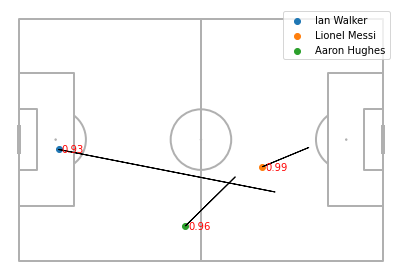

In [367]:
# CODE THIS SOON!!!!!!! - PASS MAP

pitch = Pitch()
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

plt.scatter(test['location_x'], test['location_y'], label = test['player_name'])
plt.arrow(test['location_x'], test['location_y'], test['pass_length'] * np.cos(test['pass_angle']), test['pass_length'] * np.sin(test['pass_angle']))
plt.text(test['location_x'] + 1, test['location_y'] + 1, s = np.round(test['simple_pass_rate'], 2), color = 'red')

plt.scatter(test_2['location_x'], test_2['location_y'], label = test_2['player_name'])
plt.arrow(test_2['location_x'], test_2['location_y'], test_2['pass_length'] * np.cos(test_2['pass_angle']), test_2['pass_length'] * np.sin(test_2['pass_angle']))
plt.text(test_2['location_x'] + 1, test_2['location_y'] + 1, s = np.round(test_2['simple_pass_rate'], 2), color = 'red')

plt.scatter(test_3['location_x'], test_3['location_y'], label = test_3['player_name'])
plt.arrow(test_3['location_x'], test_3['location_y'], test_3['pass_length'] * np.cos(test_3['pass_angle']), test_3['pass_length'] * np.sin(test_3['pass_angle']))
plt.text(test_3['location_x'] + 1, test_3['location_y'] + 1, s = np.round(test_3['simple_pass_rate'], 2), color = 'red')

plt.legend()


In [319]:
pass_info.get('pass_angle').min()

-2.9996955

In [354]:
pass_info.to_csv('player_passes_avgs.csv', index = True)

In [290]:
pass_info.get('Success').sort_values(ascending = False)

player_name
João Filipe Iria Santos Moutinho    1.0
Eugen Polanski                      1.0
Ezequiel Muñoz                      1.0
Michal Ďuriš                        1.0
Mickaël Malsa                       1.0
                                   ... 
Diafra Sakho                        0.5
Ermedin Demirović                   0.5
Fiona Brown                         0.5
Borja Viguera Manzanares            0.5
Arnór Ingvi Traustason              0.0
Name: Success, Length: 4224, dtype: float64

In [311]:
counts.to_csv('player_pos_counts.csv', index = True)

In [310]:
counts = counts.replace(name_dict)#.replace(name_dict).sort_values()

In [280]:
counts.reset_index().merge(pass_info, left_on = 'player_name', right_index = True)

,team_name,position,player_name,count,Success,location_x,location_y
0,AC Milan,Center Attacking Midfield,Ricardo Izecson dos Santos Leite,1,0.987097,75.126452,35.834194
17,AC Milan,Right Attacking Midfield,Ricardo Izecson dos Santos Leite,1,0.987097,75.126452,35.834194
10467,Real Madrid,Center Attacking Midfield,Ricardo Izecson dos Santos Leite,4,0.987097,75.126452,35.834194
1,AC Milan,Center Defensive Midfield,Andrea Pirlo,2,0.960159,61.255378,42.612351
6897,Juventus,Center Defensive Midfield,Andrea Pirlo,1,0.960159,61.255378,42.612351
...,...,...,...,...,...,...,...
13947,Yeovil Town LFC,Right Wing,Rachel Mclauchlan,1,0.982249,54.881657,63.964497
13903,Yeovil Town LFC,Right Back,Amy Goddard,11,0.939068,49.250896,66.372760
13915,Yeovil Town LFC,Right Center Forward,Amy Goddard,1,0.939068,49.250896,66.372760
13932,Yeovil Town LFC,Right Midfield,Amy Goddard,1,0.939068,49.250896,66.372760


In [288]:
counts.loc['Barcelona'].sort_values('count', ascending = False)

count
position                  player_name                          
Center Defensive Midfield Sergio Busquets i Burgos          311
Right Wing                Lionel Andrés Messi Cuccittini    294
Right Center Back         Gerard Piqué Bernabéu             276
Goalkeeper                Víctor Valdés Arribas             255
Right Back                Daniel Alves da Silva             219
...                                                         ...
Left Defensive Midfield   Héctor Junior Firpo Adames          1
                          Gnégnéri Yaya Touré                 1
                          Gianluca Zambrotta                  1
                          Gerard Piqué Bernabéu               1
Secondary Striker         Sergi Roberto Carnicer              1

[843 rows x 1 columns]